# Wine Quality Classification

In [25]:
# https://www.kaggle.com/rajyellow46/wine-quality/data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.multiclass import OneVsOneClassifier as OVO
from sklearn.multiclass import OneVsRestClassifier as OVR

In [26]:
data = pd.read_csv("winequalityN.csv")

In [27]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [28]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [29]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# EDA

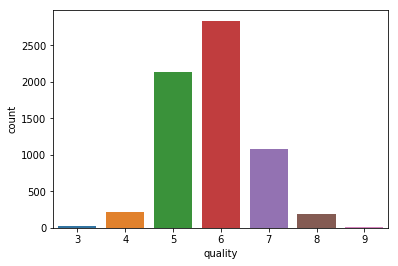

In [30]:
# quality 
sns.countplot(data["quality"])

In [31]:
# imbalance in quality
# reassign the quality class, less than 6 = 1, equal to 6 = 2, greater than 6 = 3
def reassign(x):
    if x < 6:
        return 1
    elif x == 6:
        return 2
    else:
        return 3
data["quality_origin"] = data["quality"]
data["quality"] = data["quality"].apply(reassign)

In [32]:
data["quality"].value_counts()
# 1:2:3 
display(2836/1277)
2384/1277

2.220830070477682

1.8668754894283477

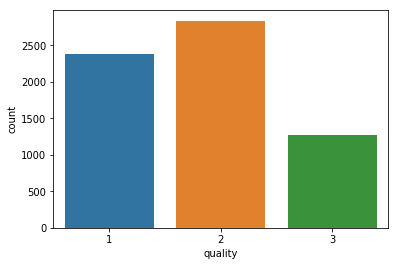

In [33]:
sns.countplot(data["quality"])

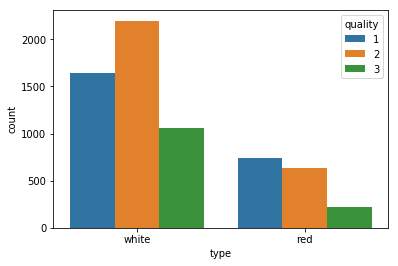

In [34]:
# wine
sns.countplot(x = "type", hue="quality",data=data)

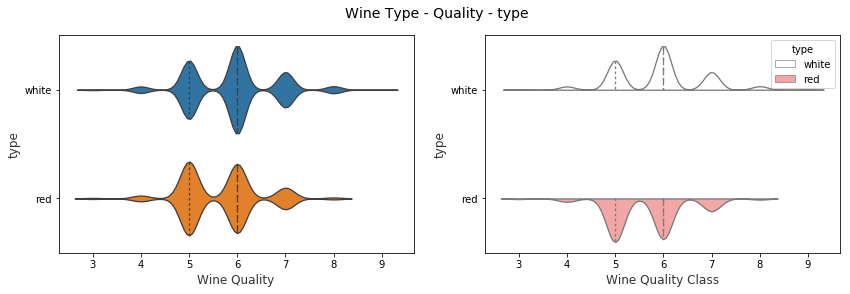

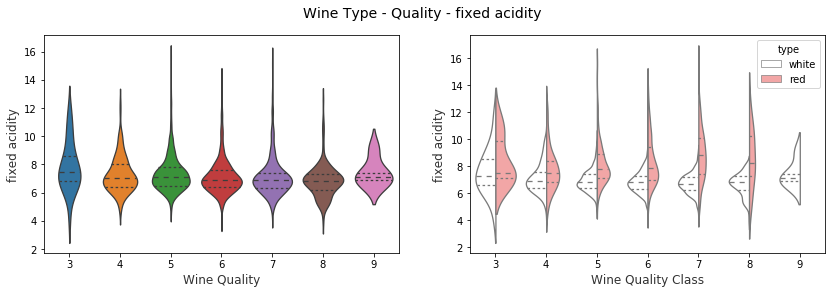

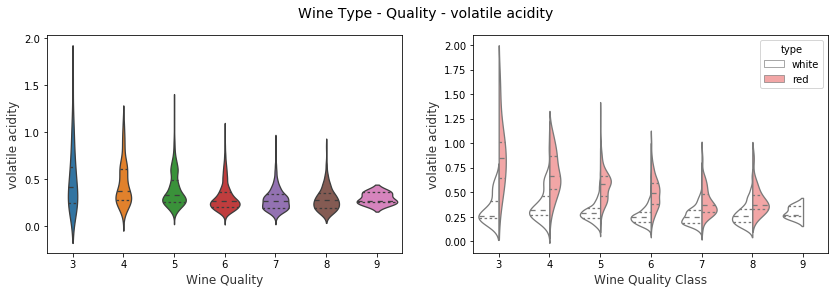

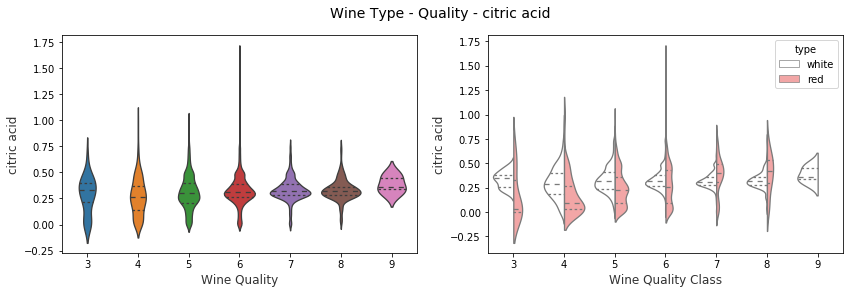

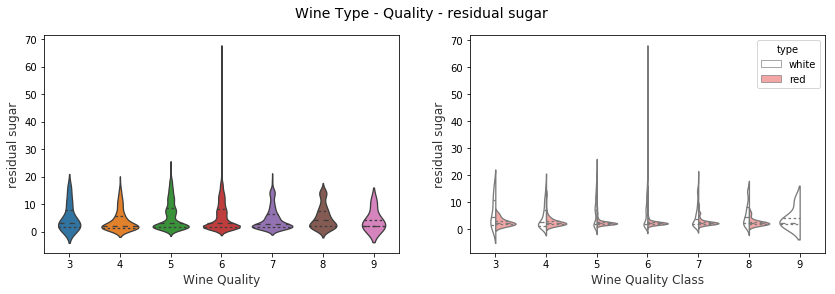

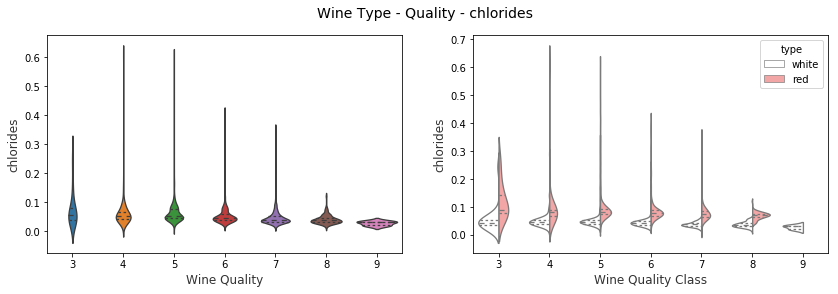

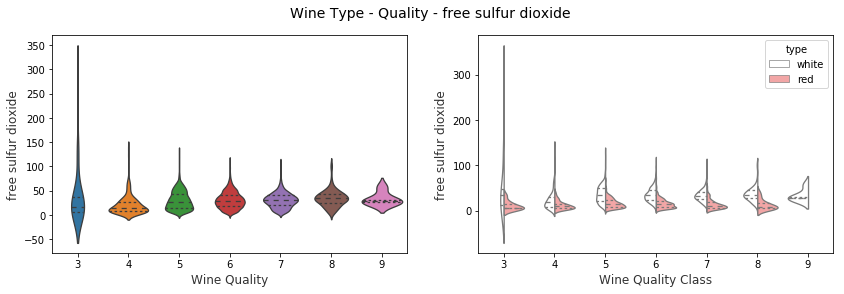

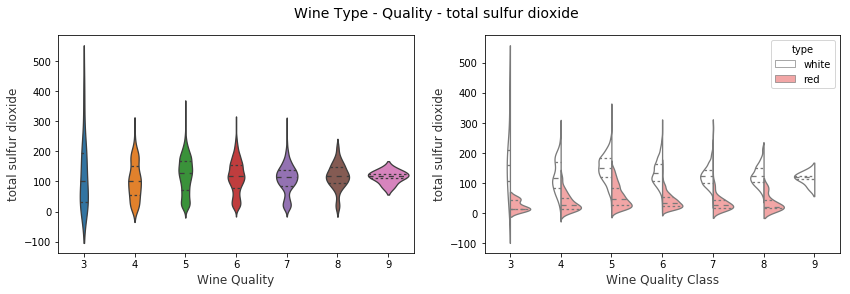

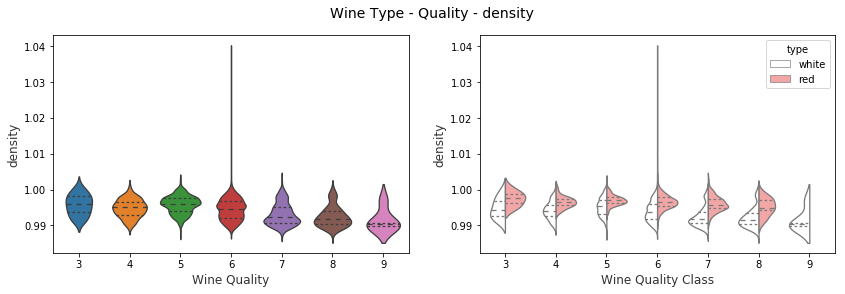

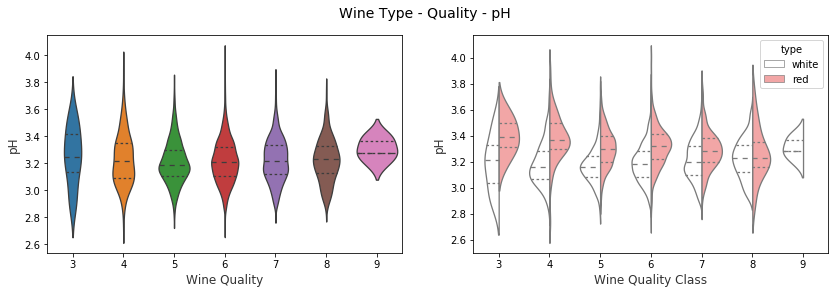

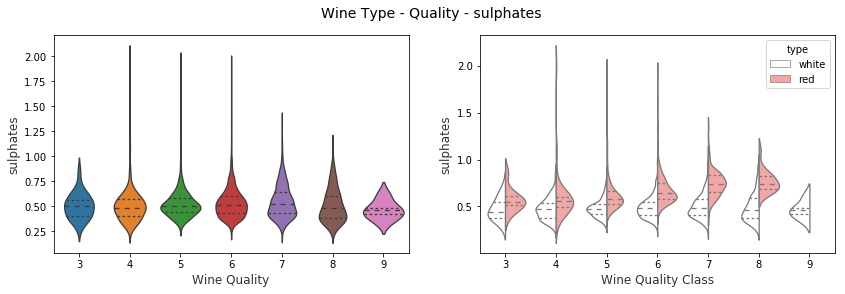

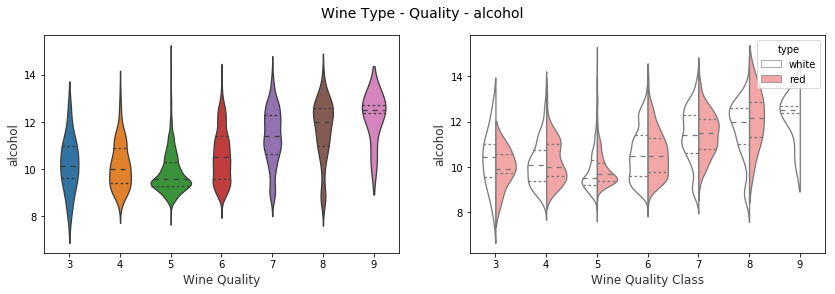

In [35]:
feature_cols = ['type','fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for i in feature_cols:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    f.suptitle('Wine Type - Quality - '+i, fontsize=14)

    sns.violinplot(x='quality_origin', y=i,  data=data, split=True, inner='quart', linewidth=1.3,
                 ax=ax1)
    ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
    ax1.set_ylabel(i,size = 12,alpha=0.8)

    sns.violinplot(x='quality_origin', y=i, hue='type', data=data, split=True, inner='quart', linewidth=1.3,
                   palette={'red': '#FF9999', 'white': 'white'}, ax=ax2)
    ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
    ax2.set_ylabel(i,size = 12,alpha=0.8)
    plt.show()

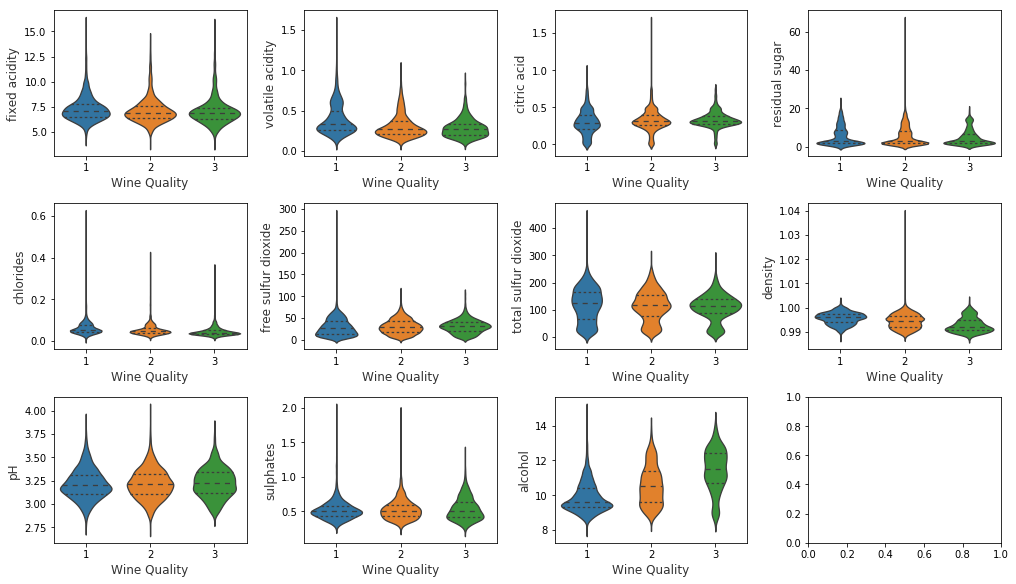

In [36]:
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

fig, axs = plt.subplots(3, 4, figsize=(14, 8),constrained_layout=True)
for i,f in enumerate(feature_cols):
    x ,y = i//4, i%4
    s = sns.violinplot(x='quality', y=f,  data=data, split=True, inner='quart', linewidth=1.3,
                 ax=axs[x,y])
    s.set_xlabel("Wine Quality",size = 12,alpha=0.8)
    s.set_ylabel(f,size = 12,alpha=0.8)


# plt.savefig("violin.png")

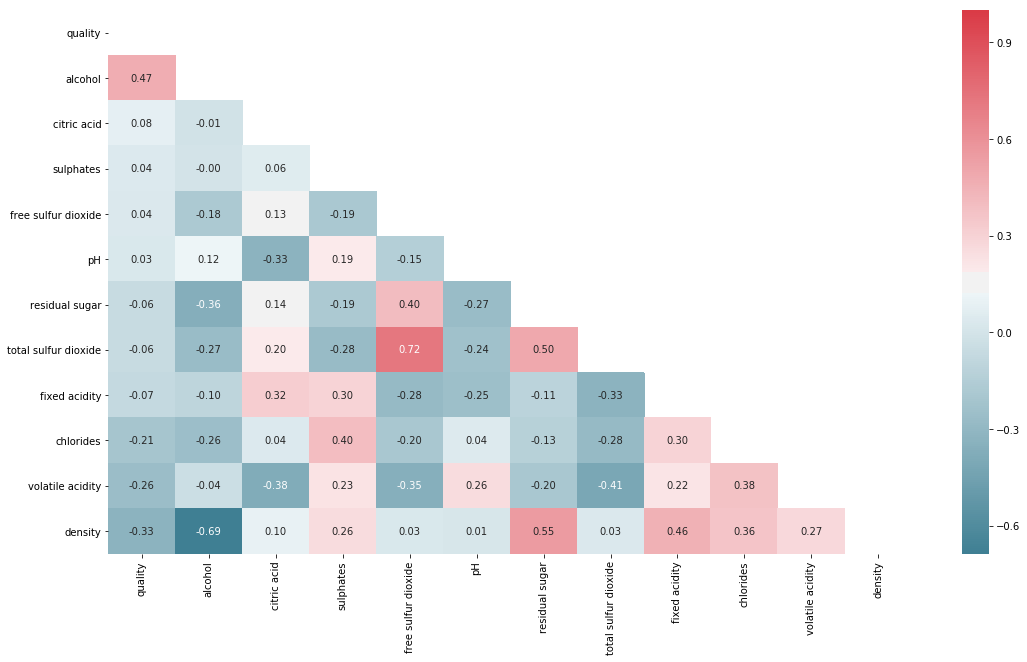

In [37]:
corr = data.corr()
top_corr_cols = corr.quality.sort_values(ascending=False).keys() 
top_corr_cols = top_corr_cols.drop('quality_origin')
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(18, 10))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)
plt.savefig("corr.png")

/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


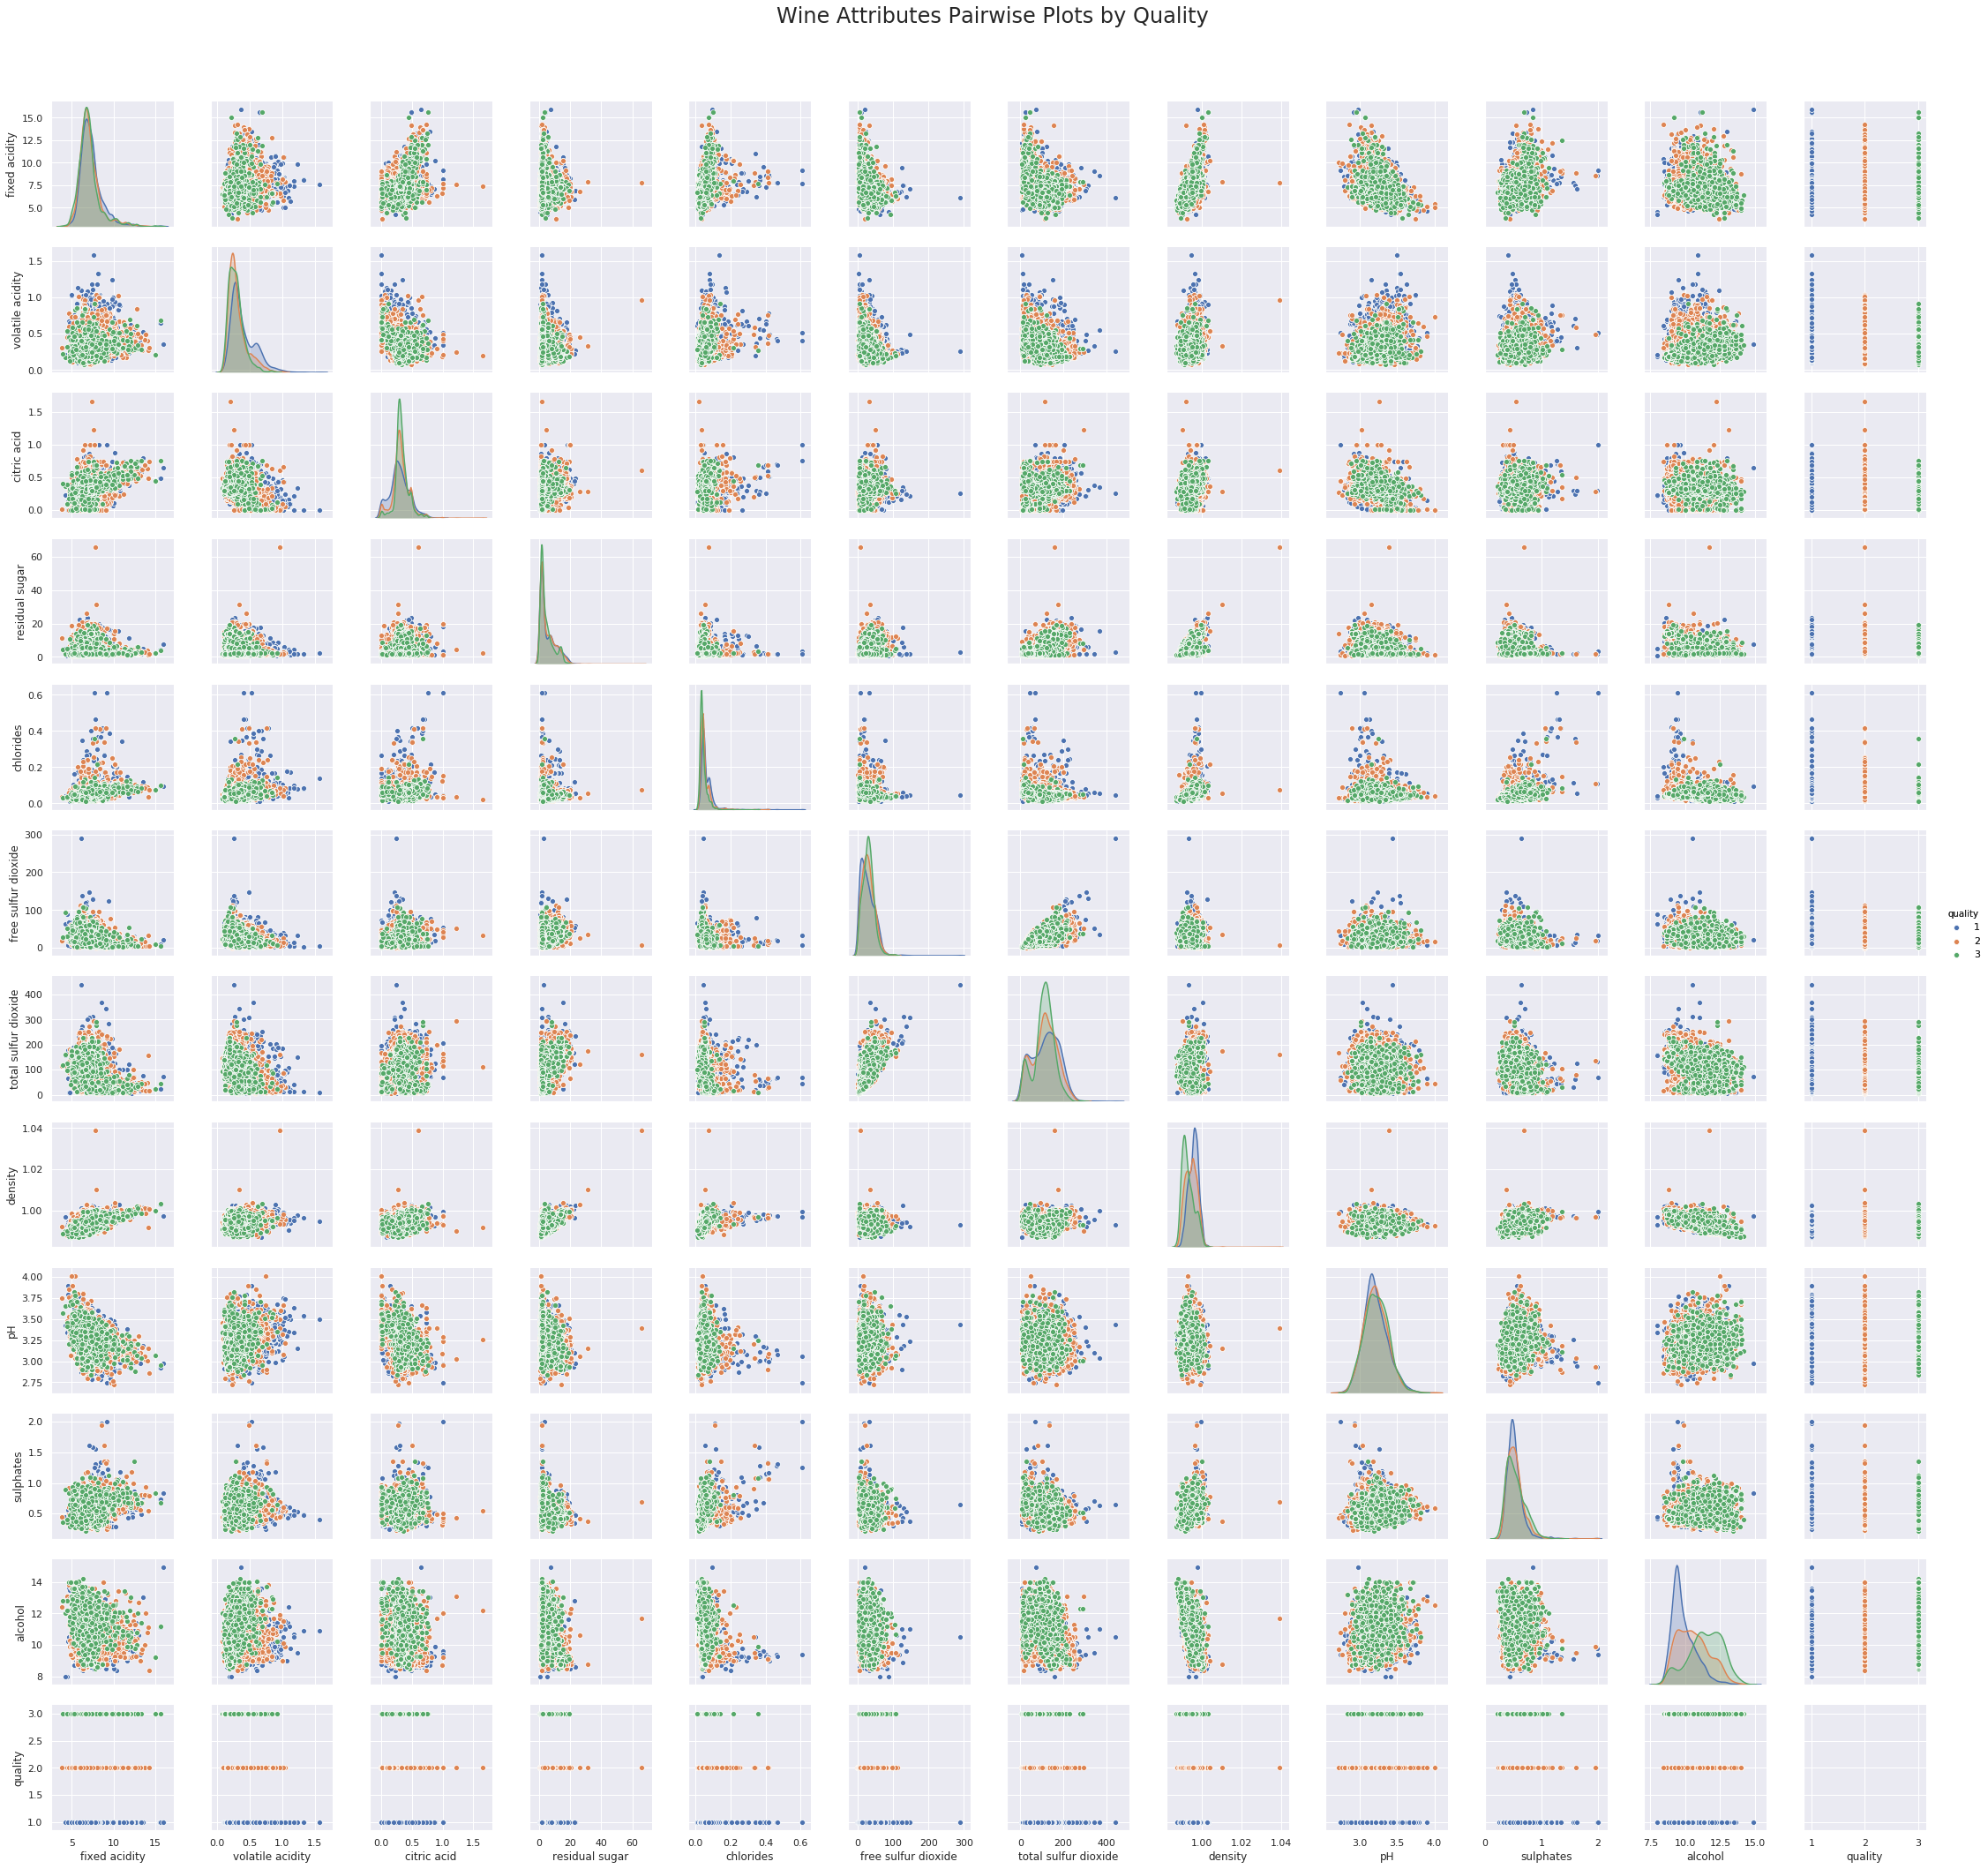

In [38]:
sns.set(font_scale=1.0)
cols = feature_cols + ["quality"]
g = sns.pairplot(data = data.loc[:, cols], hue='quality')
g = g.add_legend()
fig = g.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots by Quality', fontsize=24)

# fig.savefig("pair.png")
plt.show()


In [39]:
# dummy variables
data_new = pd.get_dummies(data, columns=["type"])

In [40]:
# fillna
data_new.fillna(0, inplace=True)

In [41]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
quality_origin          6497 non-null int64
type_red                6497 non-null uint8
type_white              6497 non-null uint8
dtypes: float64(11), int64(2), uint8(2)
memory usage: 672.6 KB


In [42]:
# feature_cols = ['type_red','type_white','fixed acidity', 'volatile acidity', 'citric acid',
#        'residual sugar', 'chlorides', 'free sulfur dioxide',
#        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
# feature_cols = ['chlorides', 'alcohol','volatile acidity','density' ]

In [43]:
# split data into train test set
X = data_new[feature_cols]
y = data_new["quality"]

# normalize data
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale,y, test_size=0.3, random_state=3) 

In [44]:
X_train

array([[-0.45655388, -0.54115965,  0.62886494, ..., -0.31917202,
         0.46278438, -0.2446721 ],
       [ 0.07127869,  2.12606264,  0.00980368, ...,  0.57938097,
        -0.13987009, -0.83161516],
       [-0.45655388, -1.02610916, -0.12776549, ..., -0.2193328 ,
         0.32886116,  0.42611996],
       ...,
       [-0.9089818 , -0.48054096,  0.07858827, ...,  0.37970252,
        -0.2068317 ,  1.85155309],
       [-0.38114923, -0.54115965, -0.40290382, ...,  1.67761239,
         0.6636692 , -0.91546416],
       [-0.45655388,  2.33822805, -1.57224175, ...,  0.67922019,
        -0.27379331,  0.25842195]])

In [45]:
def get_report(true_labels, predicted_labels, target_names=[1,2,3]):
    print('Model Performance metrics:')
    print('-'*30)
    print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(true_labels, predicted_labels)))
    print('Precision: {:2.2%} '.format(metrics.precision_score(true_labels, predicted_labels, average='weighted')))
    print('Recall:    {:2.2%} '.format(metrics.recall_score(true_labels, predicted_labels, average='weighted')))
    print('F1 Score:  {:2.2%} '.format(metrics.f1_score(true_labels, predicted_labels, average='weighted')))
    
    print('\nModel Classification report:')
    print('-'*30)
    print(metrics.classification_report(true_labels, predicted_labels))
    
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    total_classes = len(target_names)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], target_names], codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], target_names], codes=level_labels)) 
    print(cm_frame) 
    
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    get_report(y_test, y_predict)


# pca

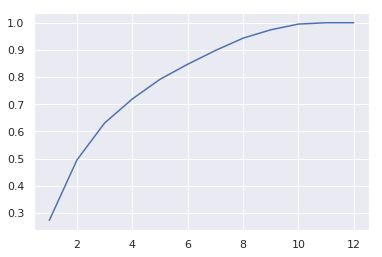

In [46]:
# pca = PCA(n_components = 2)
pca = PCA()
pca.fit(X_train)
evr = pca.explained_variance_ratio_
acc_evr = [ sum(evr[:i+1]) for i in range(len(evr) + 1)]
sns.lineplot([i + 1 for i in range(pca.n_components_+1)], acc_evr)


In [47]:
np.sum(pca.components_, axis=0)

array([-0.47121431,  1.25808734,  1.44066496,  0.39750899,  0.21655355,
        0.9528834 ,  0.31322614,  0.94737202, -2.09189243, -0.62150981,
        0.49884813])

# LR  

In [48]:
%%time
clf1 = LogisticRegression(max_iter=1000)
get_result(clf1, X_train, y_train, X_test, y_test)

Model Performance metrics:
------------------------------
Accuracy:  56.62% 
Precision: 57.27% 
Recall:    56.62% 
F1 Score:  55.61% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.64      0.64      0.64       724
           2       0.51      0.64      0.57       831
           3       0.57      0.28      0.37       395

   micro avg       0.57      0.57      0.57      1950
   macro avg       0.58      0.52      0.53      1950
weighted avg       0.57      0.57      0.56      1950


Prediction Confusion Matrix:
------------------------------
          Predicted:          
                   1    2    3
Actual: 1        463  249   12
        2        230  531   70
        3         28  257  110
CPU times: user 103 ms, sys: 6.63 ms, total: 110 ms
Wall time: 49.7 ms


/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# SVM

In [49]:
%%time
# linear kernal
clf = svm.SVC(kernel='linear')
get_result(clf, X_train, y_train, X_test, y_test)

Model Performance metrics:
------------------------------
Accuracy:  54.67% 
Precision: 44.96% 
Recall:    54.67% 
F1 Score:  48.74% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.65      0.63      0.64       724
           2       0.49      0.74      0.59       831
           3       0.00      0.00      0.00       395

   micro avg       0.55      0.55      0.55      1950
   macro avg       0.38      0.45      0.41      1950
weighted avg       0.45      0.55      0.49      1950


Prediction Confusion Matrix:
------------------------------
          Predicted:        
                   1    2  3
Actual: 1        454  270  0
        2        219  612  0
        3         26  369  0
CPU times: user 897 ms, sys: 26.1 ms, total: 923 ms
Wall time: 922 ms


/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
# polynomial 
# mx_score = float("-inf")
# mx_i = 0
# for i in range(2,6):
#     clf = svm.SVC(kernel='poly', degree=i)
#     clf.fit(X_train, y_train)
#     y_predict = clf.predict(X_test)
#     score = metrics.accuracy_score(y_test, y_predict)
#     if score > mx_score:
#         mx_score = score
#         mx_i = i

clf = svm.SVC(kernel='poly', degree=3)
get_result(clf, X_train, y_train, X_test, y_test) 


/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model Performance metrics:
------------------------------
Accuracy:  57.03% 
Precision: 60.69% 
Recall:    57.03% 
F1 Score:  55.61% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.71      0.52      0.60       724
           2       0.50      0.76      0.61       831
           3       0.64      0.26      0.37       395

   micro avg       0.57      0.57      0.57      1950
   macro avg       0.62      0.51      0.53      1950
weighted avg       0.61      0.57      0.56      1950


Prediction Confusion Matrix:
------------------------------
          Predicted:          
                   1    2    3
Actual: 1        376  341    7
        2        147  632   52
        3          7  284  104


In [51]:
# radial basis function (RBF)
clf = svm.SVC(kernel='rbf')
get_result(clf, X_train, y_train, X_test, y_test)

/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model Performance metrics:
------------------------------
Accuracy:  61.03% 
Precision: 61.71% 
Recall:    61.03% 
F1 Score:  60.34% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.71      0.68      0.70       724
           2       0.55      0.68      0.60       831
           3       0.60      0.34      0.43       395

   micro avg       0.61      0.61      0.61      1950
   macro avg       0.62      0.57      0.58      1950
weighted avg       0.62      0.61      0.60      1950


Prediction Confusion Matrix:
------------------------------
          Predicted:          
                   1    2    3
Actual: 1        493  221   10
        2        187  563   81
        3         14  247  134


In [52]:
from time import time

def get_score(true_labels, predicted_labels):
    a = round(metrics.accuracy_score(true_labels, predicted_labels) , 4)
    p = round(metrics.precision_score(true_labels, predicted_labels, average="macro"), 4)
    r = round(metrics.recall_score(true_labels, predicted_labels,average="macro"), 4)
    f = round(metrics.f1_score(true_labels, predicted_labels,average="macro"), 4)
    return a, p, r, f

def func(model, model_name, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    
    y_predict1 = model.predict(X_train)
    accuracy1, precision1, recall1, f11 = get_score(y_train, y_predict1)
    
    start = time()
    y_predict2 = model.predict(X_test)
    accuracy2, precision2, recall2, f12 = get_score(y_test, y_predict2)
    
    end = time()
    
    return [model_name, accuracy1, precision1, recall1, f11, accuracy2, precision2, recall2, f12, end-start]
        
    

In [53]:
names = ["LR", "linearSVM", "polySVM", "RBFSVM"]
clf1 = LogisticRegression(max_iter=1000)
clf2 = svm.SVC(kernel='linear')
clf3 = svm.SVC(kernel='poly', degree=3)
clf4 = svm.SVC(kernel='rbf')
models = [clf1,clf2,clf3,clf4]

names2 = []
models2 = []
for i in range(len(models)):
    names2.append(names[i])
    models2.append(models[i])
    
    names2.append(names[i] + "_ovo")
    models2.append(OVO(models[i]))
                   
    names2.append(names[i] + "_ovr")
    models2.append(OVR(models[i]))


In [54]:
res = []
for i in range(len(names2)):
    temp = func(models2[i], names2[i], X_train, y_train, X_test, y_test) 
    print(names2[i])
    print(temp)
    res.append(temp)
    

/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/User

LR
['LR', 0.5861, 0.5953, 0.532, 0.5415, 0.5662, 0.5757, 0.519, 0.528, 0.003284931182861328]
LR_ovo
['LR_ovo', 0.5874, 0.5913, 0.5397, 0.5509, 0.5667, 0.573, 0.5302, 0.5414, 0.004212141036987305]
LR_ovr
['LR_ovr', 0.5861, 0.5953, 0.532, 0.5415, 0.5662, 0.5757, 0.519, 0.528, 0.003633737564086914]


/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in l

linearSVM
['linearSVM', 0.5674, 0.3903, 0.4661, 0.4212, 0.5467, 0.3796, 0.4545, 0.4087, 0.09227609634399414]


/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in l

linearSVM_ovo
['linearSVM_ovo', 0.5674, 0.3903, 0.4661, 0.4212, 0.5467, 0.3796, 0.4545, 0.4087, 0.21149897575378418]
linearSVM_ovr
['linearSVM_ovr', 0.5239, 0.5414, 0.4776, 0.4529, 0.5108, 0.4754, 0.456, 0.4253, 0.16305994987487793]


/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


polySVM
['polySVM', 0.6195, 0.6797, 0.5569, 0.5748, 0.5703, 0.6168, 0.5144, 0.5259, 0.1018671989440918]


/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this war

polySVM_ovo
['polySVM_ovo', 0.6195, 0.6802, 0.5568, 0.5748, 0.5713, 0.6185, 0.5151, 0.5267, 0.2530522346496582]


/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this war

polySVM_ovr
['polySVM_ovr', 0.6497, 0.6636, 0.613, 0.6271, 0.5887, 0.592, 0.5531, 0.5638, 0.1923530101776123]


/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RBFSVM
['RBFSVM', 0.6657, 0.6884, 0.619, 0.6358, 0.6103, 0.6173, 0.5659, 0.5774, 0.16165995597839355]


/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this war

RBFSVM_ovo
['RBFSVM_ovo', 0.6657, 0.6886, 0.619, 0.6359, 0.6103, 0.6178, 0.5659, 0.5776, 0.39708900451660156]


/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this war

RBFSVM_ovr
['RBFSVM_ovr', 0.6666, 0.6792, 0.6357, 0.6498, 0.6062, 0.6014, 0.5746, 0.5831, 0.30992603302001953]


In [55]:
clf2 = svm.SVC(kernel='linear', class_weight="balanced")
clf3 = svm.SVC(kernel='poly', degree=3,class_weight="balanced")
clf4 = svm.SVC(kernel='rbf', class_weight="balanced")
models = [clf2,clf3,clf4]
names = ["linearSVM_balanced", "polySVM_balanced", "RBFSVM_balanced"]
for i in range(len(names)):
    temp = func(models[i], names[i], X_train, y_train, X_test, y_test) 
    res.append(temp)

/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [56]:
res_df = pd.DataFrame(res)

In [57]:
res_df.columns = ["model","accuracy1", "precision1", "recall1", "f11", "accuracy2", "precision2", "recall2", "f12", "running time"  ]

In [58]:
res_df

,model,accuracy1,precision1,recall1,f11,accuracy2,precision2,recall2,f12,running time
0,LR,0.5861,0.5953,0.5320,0.5415,0.5662,0.5757,0.5190,0.5280,0.003285
1,LR_ovo,0.5874,0.5913,0.5397,0.5509,0.5667,0.5730,0.5302,0.5414,0.004212
2,LR_ovr,0.5861,0.5953,0.5320,0.5415,0.5662,0.5757,0.5190,0.5280,0.003634
3,linearSVM,0.5674,0.3903,0.4661,0.4212,0.5467,0.3796,0.4545,0.4087,0.092276
4,linearSVM_ovo,0.5674,0.3903,0.4661,0.4212,0.5467,0.3796,0.4545,0.4087,0.211499
5,linearSVM_ovr,0.5239,0.5414,0.4776,0.4529,0.5108,0.4754,0.4560,0.4253,0.163060
6,polySVM,0.6195,0.6797,0.5569,0.5748,0.5703,0.6168,0.5144,0.5259,0.101867
7,polySVM_ovo,0.6195,0.6802,0.5568,0.5748,0.5713,0.6185,0.5151,0.5267,0.253052
8,polySVM_ovr,0.6497,0.6636,0.6130,0.6271,0.5887,0.5920,0.5531,0.5638,0.192353
9,RBFSVM,0.6657,0.6884,0.6190,0.6358,0.6103,0.6173,0.5659,0.5774,0.161660


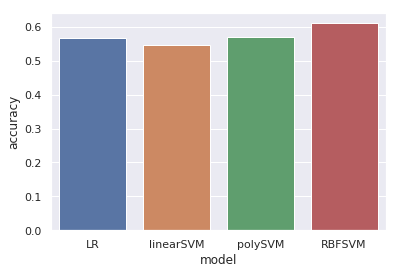

In [59]:
g = sns.barplot(x="model", y ="accuracy2", data=res_df.iloc[[0,3,6,9]])
g.set(ylabel="accuracy")
plt.savefig("accuracy.png")

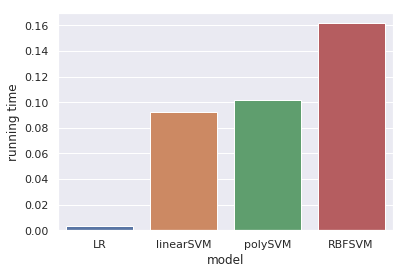

In [60]:
col = "running time"
g = sns.barplot(x="model", y =col, data=res_df.iloc[[0,3,6,9]])
g.set(ylabel=col)
plt.savefig("running.png")


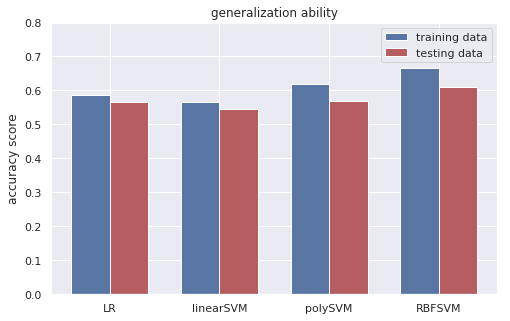

In [61]:
# generalization
origin = res_df.iloc[[0,3,6,9]]
x = origin["model"].unique()
train_score = origin["accuracy1"]
test_score = origin["accuracy2"]
N = 4
ind = np.arange(N)  # the x locations for the groups

width = 0.35       # the width of the bars

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind,train_score, width, color='#5975a4', label="training data")

rects2 = ax.bar(ind+width, test_score, width, color='#b55d60', label="testing data")
plt.ylabel('accuracy score')
plt.title('generalization ability')

plt.xticks(ind + width / 2, x)
plt.ylim([0,0.8])

# Finding the best position for legends and putting it
plt.legend(loc='best')

plt.savefig("general.png")

plt.show()

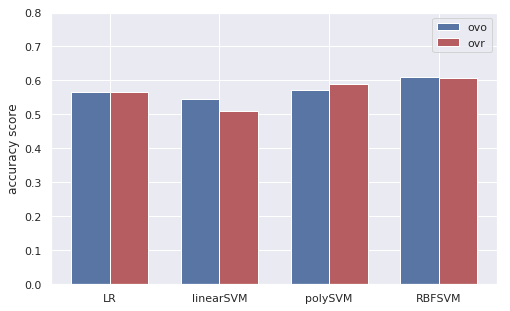

In [62]:
# ovo

ovo = res_df.iloc[[1,4,7,10]]
ovr = res_df.iloc[[2,5,8,11]]
x = ['LR', 'linearSVM', 'polySVM', 'RBFSVM']
N = 4
ind = np.arange(N)  # the x locations for the groups

width = 0.35       # the width of the bars

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind,ovo["accuracy2"], width, color='#5975a4', label="ovo")
rects2 = ax.bar(ind+width, ovr["accuracy2"], width, color='#b55d60', label="ovr")

plt.ylabel('accuracy score')
plt.xticks(ind + width / 2, x)
plt.ylim([0,0.8])
plt.legend(loc='best')
plt.savefig("ovo.png")
plt.show()

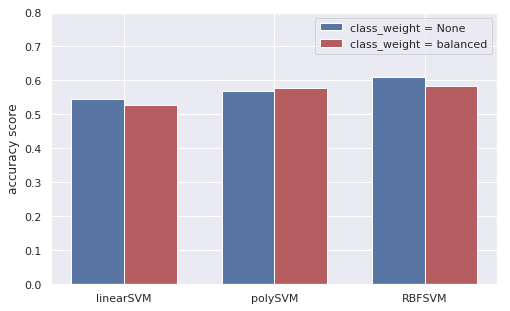

In [63]:
# balanced
ovo = res_df.iloc[[3,6,9]]
ovr = res_df.iloc[[12,13,14]]
x = ['linearSVM', 'polySVM', 'RBFSVM']

N = 3
ind = np.arange(N)  # the x locations for the groups

width = 0.35       # the width of the bars

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind,ovo["accuracy2"], width, color='#5975a4', label="class_weight = None")
rects2 = ax.bar(ind+width, ovr["accuracy2"], width, color='#b55d60', label="class_weight = balanced")

plt.ylabel('accuracy score')
plt.xticks(ind + width / 2, x)
plt.ylim([0,0.8])
plt.legend(loc='best')
plt.savefig("balanced_accuracy.png")
plt.show()

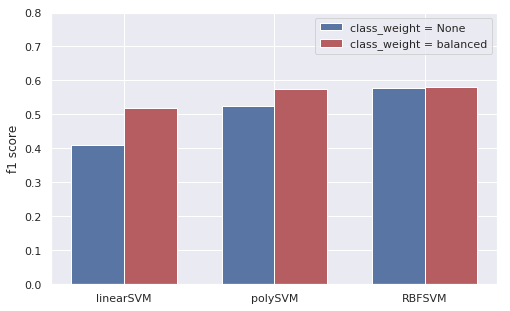

In [64]:
# balanced f1 score
ovo = res_df.iloc[[3,6,9]]
ovr = res_df.iloc[[12,13,14]]
x = ['linearSVM', 'polySVM', 'RBFSVM']

N = 3
ind = np.arange(N)  # the x locations for the groups

width = 0.35       # the width of the bars

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind,ovo["f12"], width, color='#5975a4', label="class_weight = None")
rects2 = ax.bar(ind+width, ovr["f12"], width, color='#b55d60', label="class_weight = balanced")

plt.ylabel('f1 score')
plt.xticks(ind + width / 2, x)
plt.ylim([0,0.8])
plt.legend(loc='best')
plt.savefig("balanced_f1.png")
plt.show()

# decision boundary

In [65]:
def plot_decision_boundary2(X2,y2,clf):
    """
    X2: two features vectors
    y2: target variable
    clf: classifer
    """
    
    clf.fit(X2, y2)
    f1 = X2.iloc[:, 0]
    f2 = X2.iloc[:, 1]
 
    x_min, x_max = f1.min() - .5, f1.max() + .5
    y_min, y_max = f2.min() - .5, f2.max() + .5
    h = 0.01
 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(f1, f2, c=y2, cmap=plt.cm.Spectral)
    plt.show()

In [66]:
clf1 = LogisticRegression(max_iter=1000)
clf2 = svm.SVC(kernel='linear',class_weight="balanced")
clf3 = svm.SVC(kernel='poly', degree=3, class_weight="balanced")
clf4 = svm.SVC(kernel='rbf', class_weight="balanced")

In [67]:
import random
def plot_decision_boundary(features,label,clf, title, cols, is_save=None):
    
    
    clf.fit(features[cols], label)
    f1 = features[cols[0]]
    f2 = features[cols[1]]
 
    x_min, x_max = f1.min() - .5, f1.max() + .5
    y_min, y_max = f2.min() - .5, f2.max() + .5
    
    newx = []
    newy = []
    newlabel = []
    print("generating points")
    for _ in range(5000):
        px = random.uniform(x_min, x_max)
        py = random.uniform(y_min, y_max)
        plabel = clf.predict([[px,py]])
        newx.append(px)
        newy.append(py)
        newlabel.append(plabel)
        
    print("done")
    colors = ['r' if i == 1 else 'g' if i == 2 else 'b' for i in newlabel]
    plt.scatter(newx, newy, marker='.', s=7, c=colors)
    
    colors = ['r' if i == 1 else 'g' if i == 2 else 'b' for i in label]
    plt.scatter(f1, f2, s=30, marker='x',c=colors)
    
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.title(title)
    if is_save:
        plt.savefig(title + ".png")
    plt.show()
    


generating points
done


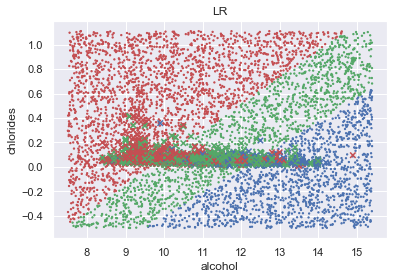

generating points
done


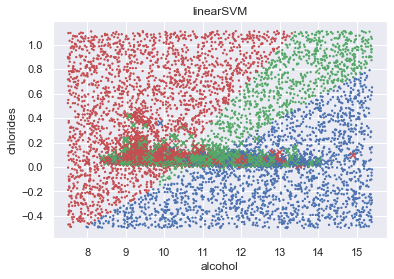

generating points
done


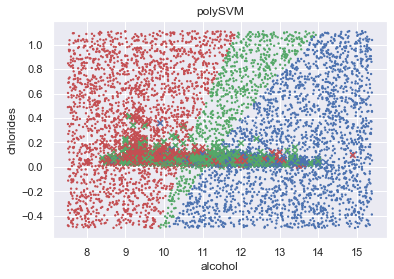

generating points
done


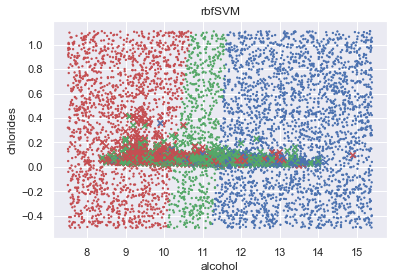

In [158]:
flag = True
plot_decision_boundary(X, y, clf1, "LR", ["alcohol", "chlorides"], flag)
plot_decision_boundary(X, y, clf2, 'linearSVM',["alcohol", "chlorides"], flag)
plot_decision_boundary(X, y, clf3, 'polySVM', ["alcohol", "chlorides"], flag)
plot_decision_boundary(X, y, clf4, 'rbfSVM', ["alcohol", "chlorides"], flag)

# Mushroom Classification

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('mushrooms.csv')

In [8]:
display(df.shape)
df.head(2)

(8124, 23)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [9]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Visualize the data

## Cap Color Graph

In [10]:
color_grouped = df.groupby(['cap-color', 'class']).count()

In [11]:
color_grouped

cap-shape  cap-surface  bruises  odor  gill-attachment  \
cap-color class                                                           
b         e             48           48       48    48               48   
          p            120          120      120   120              120   
c         e             32           32       32    32               32   
          p             12           12       12    12               12   
e         e            624          624      624   624              624   
          p            876          876      876   876              876   
g         e           1032         1032     1032  1032             1032   
          p            808          808      808   808              808   
n         e           1264         1264     1264  1264             1264   
          p           1020         1020     1020  1020             1020   
p         e             56           56       56    56               56   
          p             88           88       88    88               88   
r         e             16           16       16    16               16   
u         e             16           16       16    16               16   
w         e            720          720      720   720              720   
          p            320          320      320   320              320   
y         e            400          400      400   400              400   
          p            672          672      672   672              672   

                 gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
cap-color class                                                                 
b         e                48         48          48           48          48   
          p               120        120         120          120         120   
c         e                32         32          32           32          32   
          p                12         12          12           12          12   
e         e               624        624         624          624         624   
          p               876        876         876          876         876   
g         e              1032       1032        1032         1032        1032   
          p               808        808         808          808         808   
n         e              1264       1264        1264         1264        1264   
          p              1020       1020        1020         1020        1020   
p         e                56         56          56           56          56   
          p                88         88          88           88          88   
r         e                16         16          16           16          16   
u         e                16         16          16           16          16   
w         e               720        720         720          720         720   
          p               320        320         320          320         320   
y         e               400        400         400          400         400   
          p               672        672         672          672         672   

                 ...  stalk-surface-below-ring  stalk-color-above-ring  \
cap-color class  ...                                                     
b         e      ...                        48                      48   
          p      ...                       120                     120   
c         e      ...                        32                      32   
          p      ...                        12                      12   
e         e      ...                       624                     624   
          p      ...                       876                     876   
g         e      ...                      1032                    1032   
          p      ...                       808                     808   
n         e      ...                      1264                    1264   
          p      ...                      1020                    1020   
p      

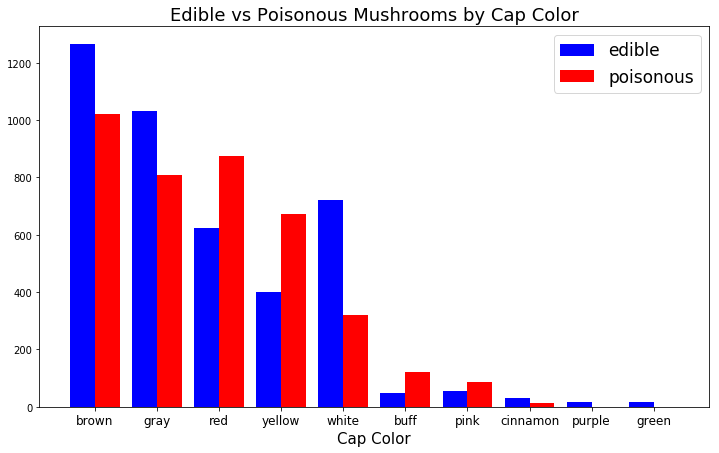

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [12]:
#Obtain total number of mushrooms for each 'cap-color' (Entire DataFrame)
cap_colors = df['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes
cap_color_labels = cap_colors.axes[0].tolist()

ind = np.arange(10)

poisonous_cc = []
edible_cc = [] 
for capColor in cap_color_labels:
    size = len(df[df['cap-color'] == capColor].index)
    edibles = len(df[(df['cap-color'] == capColor) & (df['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='blue')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='red')

ax.set_xlabel("Cap Color",fontsize=15)
ax.set_title('Edible vs Poisonous Mushrooms by Cap Color',fontsize=18)
ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
plt.show()
print(edible_cc)
print(poisonous_cc)

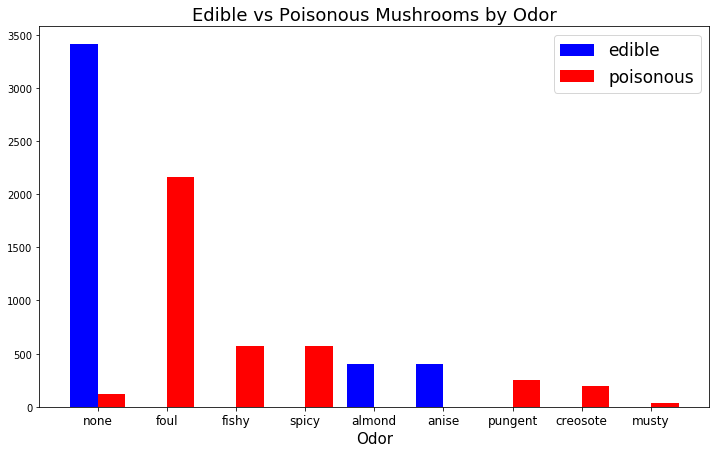

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


In [13]:
odors = df['odor'].value_counts()
odor_height = odors.values.tolist() 
odor_labels = odors.axes[0].tolist() 

width = 0.7 
ind = np.arange(9)  
poisonous_od = [] 
edible_od = []    
for odor in odor_labels:
    size = len(df[df['odor'] == odor].index)
    edibles = len(df[(df['odor'] == odor) & (df['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='blue')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='red')

ax.set_xlabel("Odor",fontsize=15)
ax.set_title('Edible vs Poisonous Mushrooms by Odor',fontsize=18)
ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
plt.show()
print(edible_od)
print(poisonous_od)

## Logistic regression

### All Variables

In [14]:
y = df_dummies.class_p
X = df_dummies.drop(["class_e", "class_p"], axis= 1).astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1234)
print(len(X_train), len(X_test), len(y_train), len(y_test))
lm = LogisticRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))


6499 1625 6499 1625


/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'predicted range: [0.00,1.00]'

'precision = [1. 1.]'

'recall = [1. 1.]'

'f-score = [1. 1.]'

In [15]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [1. 1.]'

'recall = [1. 1.]'

'f-score = [1. 1.]'

In [16]:
clf = svm.SVC(kernel='poly', degree=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'precision = [0.88707926 1.        ]'

'recall = [1.         0.87128713]'

'f-score = [0.9401611  0.93121693]'

In [17]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'precision = [0.997558 1.      ]'

'recall = [1.         0.99752475]'

'f-score = [0.99877751 0.99876084]'

### Cap-color and Odor only Model

In [18]:
df_2vars = df[['class', 'cap-color', 'odor']]

In [19]:
df_dummies = pd.get_dummies(df_2vars)
y = df_dummies.class_p
X = df_dummies.drop(["class_e", "class_p"], axis= 1).astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1234)
print(len(X_train), len(X_test), len(y_train), len(y_test))
lm = LogisticRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

6499 1625 6499 1625


/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'predicted range: [0.00,1.00]'

'precision = [0.9634434 1.       ]'

'recall = [1.         0.96163366]'

'f-score = [0.98138138 0.98044164]'

In [20]:
from sklearn import svm

# clf = svm.SVC(kernel='linear', class_weight={0:1})
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.96686391 1.        ]'

'recall = [1.         0.96534653]'

'f-score = [0.98315283 0.98236776]'

In [21]:
clf = svm.SVC(kernel='poly', degree=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'precision = [0.960047 1.      ]'

'recall = [1.         0.95792079]'

'f-score = [0.97961631 0.97850822]'

In [22]:
clf = svm.SVC(kernel='poly', degree=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'precision = [0.9634434 1.       ]'

'recall = [1.         0.96163366]'

'f-score = [0.98138138 0.98044164]'

In [23]:
clf = svm.SVC(kernel='poly', degree=4)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'precision = [0.50276923 0.        ]'

'recall = [1. 0.]'

'f-score = [0.66912367 0.        ]'

In [24]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

/Users/colbywight/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'precision = [0.9634434 1.       ]'

'recall = [1.         0.96163366]'

'f-score = [0.98138138 0.98044164]'